### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [2]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the flower_types dataset and print the first five observations

In [3]:
# type your code here
df=pd.read_csv('flower_types.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
dummy1=df['class'].unique()
dummy1

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
df[df['sepal width']=='NaN']['sepal width'].sum()

0.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

0.3149109566369728


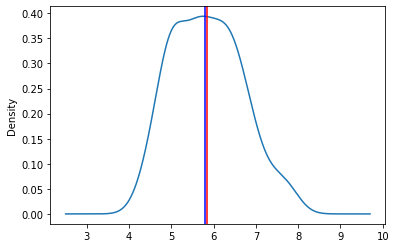

In [8]:
# type your code here
df['sepal length'].plot(kind='density')
plt.axvline(df['sepal length'].mean(),color='r')
plt.axvline(df['sepal length'].median(),color='b')

print(df['sepal length'].skew()) 
#0.3 so right skewed and so light transform is needed only. SQRT transform 

0.043593975574027555


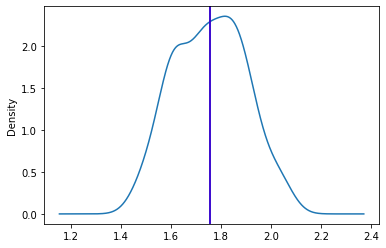

In [13]:
#Log will work and reduce the skewness
df['Transformed_sepal_length_log'] = df['sepal length'].apply(lambda x:np.log(x))
df['Transformed_sepal_length_log'].plot(kind='density') 
plt.axvline(df['Transformed_sepal_length_log'].mean(),color='r')
plt.axvline(df['Transformed_sepal_length_log'].median(),color='b')
print(df['Transformed_sepal_length_log'].skew())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

In [3]:
fe=df.groupby('class').size()/len(df)
df['class freq']=df['class'].map(fe)
df


,sepal length,sepal width,petal length,petal width,class,class freq
0,5.1,3.5,1.4,0.2,setosa,0.333333
1,4.9,3.0,1.4,0.2,setosa,0.333333
2,4.7,3.2,1.3,0.2,setosa,0.333333
3,4.6,3.1,1.5,0.2,setosa,0.333333
4,5.0,3.6,1.4,0.2,setosa,0.333333
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.333333
146,6.3,2.5,5.0,1.9,virginica,0.333333
147,6.5,3.0,5.2,2.0,virginica,0.333333
148,6.2,3.4,5.4,2.3,virginica,0.333333


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here

print('Min value in Range',df['petal width'].min())
print('Max value in Range',df['petal width'].max())

#No so we use tranformation to bring values between 0 and 1

Min value in Range 0.1
Max value in Range 2.5


In [17]:
df['Min_Max_Scaling'] =  (df['petal width']- df['petal width'].min()) / (df['petal width'].max()-df['petal width'].min())

In [42]:
df['Min_Max_Scaling'].unique() 

array([0.04166667, 0.125     , 0.08333333, 0.        , 0.16666667,
       0.20833333, 0.54166667, 0.58333333, 0.5       , 0.625     ,
       0.375     , 0.41666667, 0.70833333, 0.45833333, 0.66666667,
       1.        , 0.75      , 0.83333333, 0.875     , 0.79166667,
       0.95833333, 0.91666667])

In [19]:
print('Min value in Range',df['Min_Max_Scaling'].min())
print('Max value in Range',df['Min_Max_Scaling'].max())

Min value in Range 0.0
Max value in Range 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df.corr()>0.8

,sepal length,sepal width,petal length,petal width,Transformed_sepal_length,Transformed_sepal_length_log,Min_Max_Scaling
sepal length,True,False,True,True,True,True,True
sepal width,False,True,False,False,False,False,False
petal length,True,False,True,True,True,True,True
petal width,True,False,True,True,True,True,True
Transformed_sepal_length,True,False,True,True,True,True,True
Transformed_sepal_length_log,True,False,True,True,True,True,True
Min_Max_Scaling,True,False,True,True,True,True,True


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here - 

#probplot is in scipy and w euse it 


In [23]:
from scipy.stats import probplot

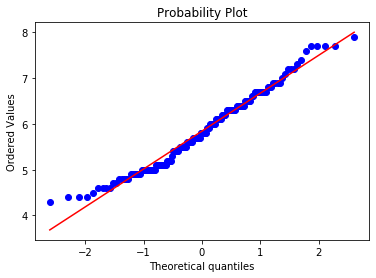

In [24]:
probplot(df['sepal length'],plot=plt)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
LE=LabelEncoder()
df['class_LE']=LE.fit_transform(df['class'])

In [59]:
df

,sepal length,sepal width,petal length,petal width,class,Transformed_sepal_length,Transformed_sepal_length_log,Min_Max_Scaling,class_LE
0,5.1,3.5,1.4,0.2,setosa,26.01,1.629241,0.041667,0
1,4.9,3.0,1.4,0.2,setosa,24.01,1.589235,0.041667,0
2,4.7,3.2,1.3,0.2,setosa,22.09,1.547563,0.041667,0
3,4.6,3.1,1.5,0.2,setosa,21.16,1.526056,0.041667,0
4,5.0,3.6,1.4,0.2,setosa,25.00,1.609438,0.041667,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,44.89,1.902108,0.916667,2
146,6.3,2.5,5.0,1.9,virginica,39.69,1.840550,0.750000,2
147,6.5,3.0,5.2,2.0,virginica,42.25,1.871802,0.791667,2
148,6.2,3.4,5.4,2.3,virginica,38.44,1.824549,0.916667,2


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# type your code here

df[['petal length','petal width','class']]

,petal length,petal width,class
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


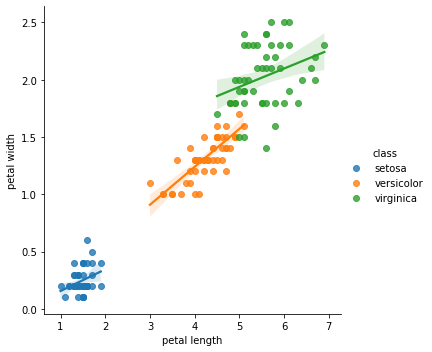

In [26]:
sns.lmplot(x='petal length',y='petal width',data=df,hue='class')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

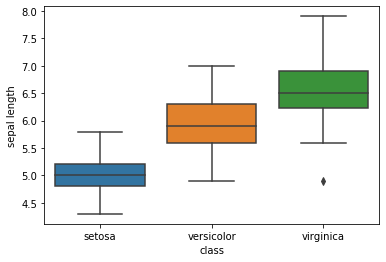

In [11]:
sns.boxplot(x='class',y='sepal length',data=df)
plt.show()